## Final Project Submission

Please fill out:
* Student name: Matthew Gittings 
* Student pace: full time
* Scheduled project review date/time: 03/11/2022
* Instructor name: Praveed Gowtham
* Blog post URL:


Installing the necessary packages to perform the data manipulation.
.
.
.


In [57]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [58]:

import pandas as pd
import csv
import numpy 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt


Importing in the data sets that will be used throughout.
.
.
.


In [59]:
movie_gross= pd.read_csv('zippedData/bom.movie_gross.csv')
movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv')
title_basics = pd.read_csv('zippedData/imdb.title.basics.csv')
rating = pd.read_csv('zippedData/tmdb.movies.csv')

Analyzing First data set -- Movie Gross.
.
.
.


In [60]:
movie_gross.shape

(3387, 5)

In [61]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [62]:
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


Cleaning data through deleteing cells from the movie_gross file which do not have value.
.
.
.


In [63]:
movie_gross.dropna(inplace=True)

Changing data to be able to combine foreign and domestic gross.
.
.
.



In [64]:
movie_gross['foreign_gross'] = movie_gross['foreign_gross'].str.replace(',','')

In [65]:
movie_gross['foreign_gross'] = movie_gross['foreign_gross'].astype(float)

In [66]:
total_gross = movie_gross['foreign_gross'] + movie_gross['domestic_gross']

Adding new column to Movie Gross file to be able to use this data.
.
.
.



In [67]:
movie_gross.insert(4, "total_gross",total_gross, True)

In [68]:
movie_gross.sort_values(by='total_gross',ascending=False)

,title,studio,domestic_gross,foreign_gross,total_gross,year
727,Marvel's The Avengers,BV,623400000.0,895500000.0,1.518900e+09,2012
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,1.405400e+09,2015
3080,Black Panther,BV,700100000.0,646900000.0,1.347000e+09,2018
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,1.341500e+09,2011
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,1.332600e+09,2017
...,...,...,...,...,...,...
711,I'm Glad My Mother is Alive,Strand,8700.0,13200.0,2.190000e+04,2011
322,The Thorn in the Heart,Osci.,7400.0,10500.0,1.790000e+04,2010
1110,Cirkus Columbia,Strand,3500.0,9500.0,1.300000e+04,2012
715,Aurora,CGld,5700.0,5100.0,1.080000e+04,2011


Analyzing next data set -- Movie Budgets.


In [69]:
movie_budgets.shape

(5782, 6)

In [70]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


Transforming data to match Movie Gross columns


In [71]:
movie_budgets = movie_budgets.rename(columns={'movie':'title'})
movie_budgets.head()

,id,release_date,title,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [72]:
movie_budgets.shape

(5782, 6)

Now removing NaN's from the movie budget file.
.
.
.

In [73]:
movie_budgets.dropna(inplace=True)

In [74]:
movie_budgets.shape

(5782, 6)

Cleaning up value columns to be able to perform calculations.
.
.
.

In [75]:
movie_budgets['production_budget'] = movie_budgets['production_budget'].str.replace(',','')

In [76]:
movie_budgets['production_budget'] = movie_budgets['production_budget'].str.replace('$','')
movie_budgets['production_budget'] = movie_budgets['production_budget'].astype(float)
movie_budgets['production_budget'].head()

0    425000000.0
1    410600000.0
2    350000000.0
3    330600000.0
4    317000000.0
Name: production_budget, dtype: float64

In [77]:
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].str.replace(',','')

In [78]:
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].str.replace('$','')
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].astype(float)
movie_budgets['worldwide_gross'].head()

0    2.776345e+09
1    1.045664e+09
2    1.497624e+08
3    1.403014e+09
4    1.316722e+09
Name: worldwide_gross, dtype: float64

Creating column of Return on Investment through dividing the gross by the budget. 
.
.
.

In [79]:
roi = (movie_budgets['worldwide_gross']/ movie_budgets['production_budget']) *100
roi

0         653.257713
1         254.667286
2          42.789243
3         424.384139
4         415.369636
            ...     
5777        0.000000
5778     4008.250000
5779       26.760000
5780        0.000000
5781    16458.272727
Length: 5782, dtype: float64

In [80]:
prod_budget = movie_budgets['production_budget']

In [81]:
budget = movie_budgets['production_budget'].sort_values(ascending=False)

Working with Title Basics file.

In [82]:
title_basics = title_basics.rename(columns={'primary_title':'title','start_year':'year'})

In [83]:
title_basics.head()

,tconst,title,original_title,year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [84]:
title_basics['genres'].value_counts()

Documentary                    32185
Drama                          21486
Comedy                          9177
Horror                          4372
Comedy,Drama                    3519
                               ...  
Comedy,Sci-Fi,Sport                1
History,Sci-Fi,Thriller            1
Animation,Biography,Fantasy        1
Mystery,Reality-TV,Thriller        1
Mystery,Thriller,Western           1
Name: genres, Length: 1085, dtype: int64

In [85]:
title_basics.shape

(146144, 6)

In [86]:
movie_gross.shape

(2007, 6)

Merging Movie Gross and Title Basics dataFrames by Year and Title columns. 

In [87]:
outer_merged = movie_gross.merge(title_basics,on=["title","year"])

In [88]:
outer_merged.shape

(1268, 10)

Merging the combined Movie Gross and Title Basics dataFrame -Outer Merged- into new dataFrame df which includes the Movie Budgets dataFrame.
.
.
.

In [89]:
df = outer_merged.merge(movie_budgets,on=['title'])

In [90]:
df.shape

(961, 15)

In [91]:
df.head(10)

,title,studio,domestic_gross_x,foreign_gross,total_gross,year,tconst,original_title,runtime_minutes,genres,id,release_date,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000.0,1.067000e+09,2010,tt0435761,Toy Story 3,103.0,"Adventure,Animation,Comedy",47,"Jun 18, 2010",200000000.0,"$415,004,880",1.068880e+09
1,Inception,WB,292600000.0,535700000.0,8.283000e+08,2010,tt1375666,Inception,148.0,"Action,Adventure,Sci-Fi",38,"Jul 16, 2010",160000000.0,"$292,576,195",8.355246e+08
2,Shrek Forever After,P/DW,238700000.0,513900000.0,7.526000e+08,2010,tt0892791,Shrek Forever After,93.0,"Adventure,Animation,Comedy",27,"May 21, 2010",165000000.0,"$238,736,787",7.562447e+08
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,6.985000e+08,2010,tt1325004,The Twilight Saga: Eclipse,124.0,"Adventure,Drama,Fantasy",53,"Jun 30, 2010",68000000.0,"$300,531,751",7.061028e+08
4,Iron Man 2,Par.,312400000.0,311500000.0,6.239000e+08,2010,tt1228705,Iron Man 2,124.0,"Action,Adventure,Sci-Fi",15,"May 7, 2010",170000000.0,"$312,433,331",6.211564e+08
5,Tangled,BV,200800000.0,391000000.0,5.918000e+08,2010,tt0398286,Tangled,100.0,"Adventure,Animation,Comedy",15,"Nov 24, 2010",260000000.0,"$200,821,936",5.864772e+08
6,Despicable Me,Uni.,251500000.0,291600000.0,5.431000e+08,2010,tt1323594,Despicable Me,95.0,"Animation,Comedy,Family",50,"Jul 9, 2010",69000000.0,"$251,513,985",5.434646e+08
7,How to Train Your Dragon,P/DW,217600000.0,277300000.0,4.949000e+08,2010,tt0892769,How to Train Your Dragon,98.0,"Action,Adventure,Animation",30,"Mar 26, 2010",165000000.0,"$217,581,232",4.948710e+08
8,The Chronicles of Narnia: The Voyage of the Da...,Fox,104400000.0,311300000.0,4.157000e+08,2010,tt0980970,The Chronicles of Narnia: The Voyage of the Da...,113.0,"Adventure,Family,Fantasy",48,"Dec 10, 2010",155000000.0,"$104,386,950",4.181870e+08
9,The Karate Kid,Sony,176600000.0,182500000.0,3.591000e+08,2010,tt1155076,The Karate Kid,140.0,"Action,Drama,Family",77,"Jun 11, 2010",40000000.0,"$176,591,618",3.517749e+08


In [92]:
df = df.sort_values(by='total_gross',ascending=False)

In [93]:
df.corr()

,domestic_gross_x,foreign_gross,total_gross,year,runtime_minutes,id,production_budget,worldwide_gross
domestic_gross_x,1.000000,0.789275,0.910901,0.114329,0.286181,-0.048471,0.677983,0.933633
foreign_gross,0.789275,1.000000,0.972319,0.113146,0.284351,-0.057701,0.748327,0.893680
total_gross,0.910901,0.972319,1.000000,0.119537,0.300001,-0.057218,0.760851,0.955806
year,0.114329,0.113146,0.119537,1.000000,0.107017,0.046211,0.062615,0.131147
runtime_minutes,0.286181,0.284351,0.300001,0.107017,1.000000,-0.004758,0.347388,0.303172
id,-0.048471,-0.057701,-0.057218,0.046211,-0.004758,1.000000,-0.090832,-0.064152
production_budget,0.677983,0.748327,0.760851,0.062615,0.347388,-0.090832,1.000000,0.768410
worldwide_gross,0.933633,0.893680,0.955806,0.131147,0.303172,-0.064152,0.768410,1.000000


Creating Boolean Mask to see count of genres in the dataFrame

In [94]:
bool_mask = df['genres'].value_counts()

In [95]:
bool_mask = bool_mask.astype(int)

In [96]:
mask = bool_mask > 5

In [97]:
bool_mask = bool_mask[mask]

In [98]:
bool_mask

Adventure,Animation,Comedy    59
Action,Adventure,Sci-Fi       42
Comedy                        35
Comedy,Drama                  31
Comedy,Drama,Romance          28
Comedy,Romance                27
Action,Adventure,Fantasy      25
Horror,Mystery,Thriller       24
Drama                         23
Drama,Romance                 23
Action,Adventure,Drama        23
Action,Crime,Drama            22
Action,Comedy,Crime           21
Biography,Drama,History       17
Action,Crime,Thriller         16
Action,Adventure,Comedy       15
Action,Thriller               15
Drama,Thriller                14
Crime,Drama,Thriller          14
Biography,Comedy,Drama        13
Biography,Drama               12
Horror,Thriller               12
Action,Adventure,Animation    12
Action,Adventure,Thriller     11
Crime,Drama                   10
Documentary                   10
Action,Drama,Thriller         10
Comedy,Family                  9
Crime,Drama,Mystery            9
Adventure,Family,Fantasy       8
Biography,

In [99]:
#Proved to be unnecessary and useless

Inserting ROI - created earlier - into new dataFrame
.
.
.

In [100]:
df.insert(5, "roi",roi, True)
df

,title,studio,domestic_gross_x,foreign_gross,total_gross,roi,year,tconst,original_title,runtime_minutes,genres,id,release_date,production_budget,domestic_gross_y,worldwide_gross
583,Avengers: Age of Ultron,BV,459000000.0,946400000.0,1.405400e+09,89.356304,2015,tt2395427,Avengers: Age of Ultron,141.0,"Action,Adventure,Sci-Fi",4,"May 1, 2015",330600000.0,"$459,005,868",1.403014e+09
880,Black Panther,BV,700100000.0,646900000.0,1.347000e+09,119.533218,2018,tt1825683,Black Panther,134.0,"Action,Adventure,Sci-Fi",42,"Feb 16, 2018",200000000.0,"$700,059,566",1.348258e+09
881,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,1.309500e+09,145.205948,2018,tt4881806,Jurassic World: Fallen Kingdom,128.0,"Action,Adventure,Sci-Fi",13,"Jun 22, 2018",170000000.0,"$417,719,760",1.305773e+09
374,Frozen,BV,400700000.0,875700000.0,1.276400e+09,212.956024,2013,tt2294629,Frozen,102.0,"Adventure,Animation,Comedy",56,"Nov 22, 2013",150000000.0,"$400,738,009",1.272470e+09
882,Incredibles 2,BV,608600000.0,634200000.0,1.242800e+09,216.387315,2018,tt3606756,Incredibles 2,118.0,"Action,Adventure,Animation",44,"Jun 15, 2018",200000000.0,"$608,581,744",1.242521e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,The Tempest,Mira.,278000.0,68700.0,3.467000e+05,504.581835,2010,tt1274300,The Tempest,110.0,"Comedy,Drama,Fantasy",1,"Dec 10, 2010",20000000.0,"$277,943",2.779430e+05
137,The Tempest,Mira.,278000.0,68700.0,3.467000e+05,522.202901,2010,tt1683003,The Tempest,131.0,Drama,1,"Dec 10, 2010",20000000.0,"$277,943",2.779430e+05
138,Welcome to the Rileys,Gold.,159000.0,158000.0,3.170000e+05,405.616742,2010,tt1183923,Welcome to the Rileys,110.0,Drama,12,"Oct 29, 2010",10000000.0,"$152,857",3.559190e+05
878,City of Ghosts,IFC,128000.0,100000.0,2.280000e+05,271.297307,2017,tt6333056,City of Ghosts,92.0,"Documentary,War",64,"Apr 25, 2003",17500000.0,"$325,491",3.254910e+05


Creating First Plot based on the production budget and the return on investment.
.
.
.


Text(0, 0.5, 'ROI')

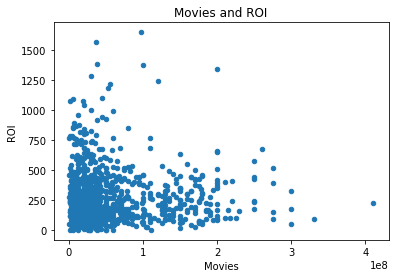

In [101]:
df.plot.scatter(x='production_budget',y='roi')
plt.title("Movies and ROI")
plt.xlabel("Movies")
plt.ylabel("ROI")

Creating plot using production budget and total gross and using roi to color the data points.

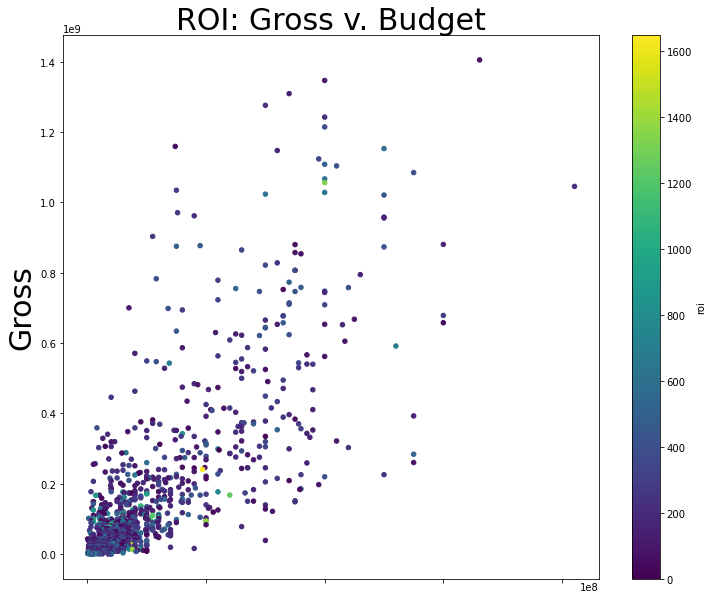

In [114]:
df.plot.scatter(x='production_budget',y='total_gross',c='roi',colormap='viridis',figsize=(12,10));
plt.xlabel("Budget",fontsize=30);
plt.title("ROI: Gross v. Budget",fontsize=30);
plt.ylabel("Gross",fontsize=30);


Creating group for Group Genre to be able to create a graph based on the Genre of the movies and Total Gross value.

In [115]:
group_genre = df.groupby(['genres']).mean()
group_genre = group_genre.sort_values(by='total_gross',ascending=False)
group_genre.head(10)

,domestic_gross_x,foreign_gross,total_gross,roi,year,runtime_minutes,id,production_budget,worldwide_gross
genres,,,,,,,,,
"Adventure,Fantasy",1.929000e+08,5.111333e+08,7.040333e+08,164.309431,2013.333333,139.666667,36.333333,2.316667e+08,7.012107e+08
"Adventure,Drama,Sci-Fi",2.082000e+08,4.455500e+08,6.537500e+08,223.825452,2014.500000,156.500000,39.000000,1.365000e+08,6.608254e+08
"Action,Adventure,Sci-Fi",2.584690e+08,3.879643e+08,6.464334e+08,304.107567,2014.000000,132.595238,44.904762,1.771333e+08,7.015004e+08
"Comedy,Mystery",2.545000e+08,3.323000e+08,5.868000e+08,113.546761,2011.000000,102.000000,39.000000,8.000000e+07,5.864643e+08
"Action,Adventure,Animation",1.796333e+08,3.401000e+08,5.197333e+08,281.051473,2013.000000,99.583333,43.750000,1.383333e+08,5.177298e+08
"Action,Adventure,Comedy",1.718133e+08,2.911733e+08,4.629867e+08,252.685179,2015.533333,111.866667,41.000000,1.018667e+08,4.628631e+08
"Adventure,Animation,Comedy",1.553627e+08,2.892661e+08,4.446288e+08,275.665860,2014.118644,94.423729,45.305085,1.079237e+08,4.446385e+08
"Action,Adventure,Fantasy",1.429800e+08,2.970440e+08,4.400240e+08,250.623916,2015.040000,119.080000,50.520000,1.566240e+08,4.374298e+08
"Biography,Drama,Musical",1.743000e+08,2.607000e+08,4.350000e+08,114.731215,2017.000000,105.000000,25.000000,8.400000e+07,3.866656e+08


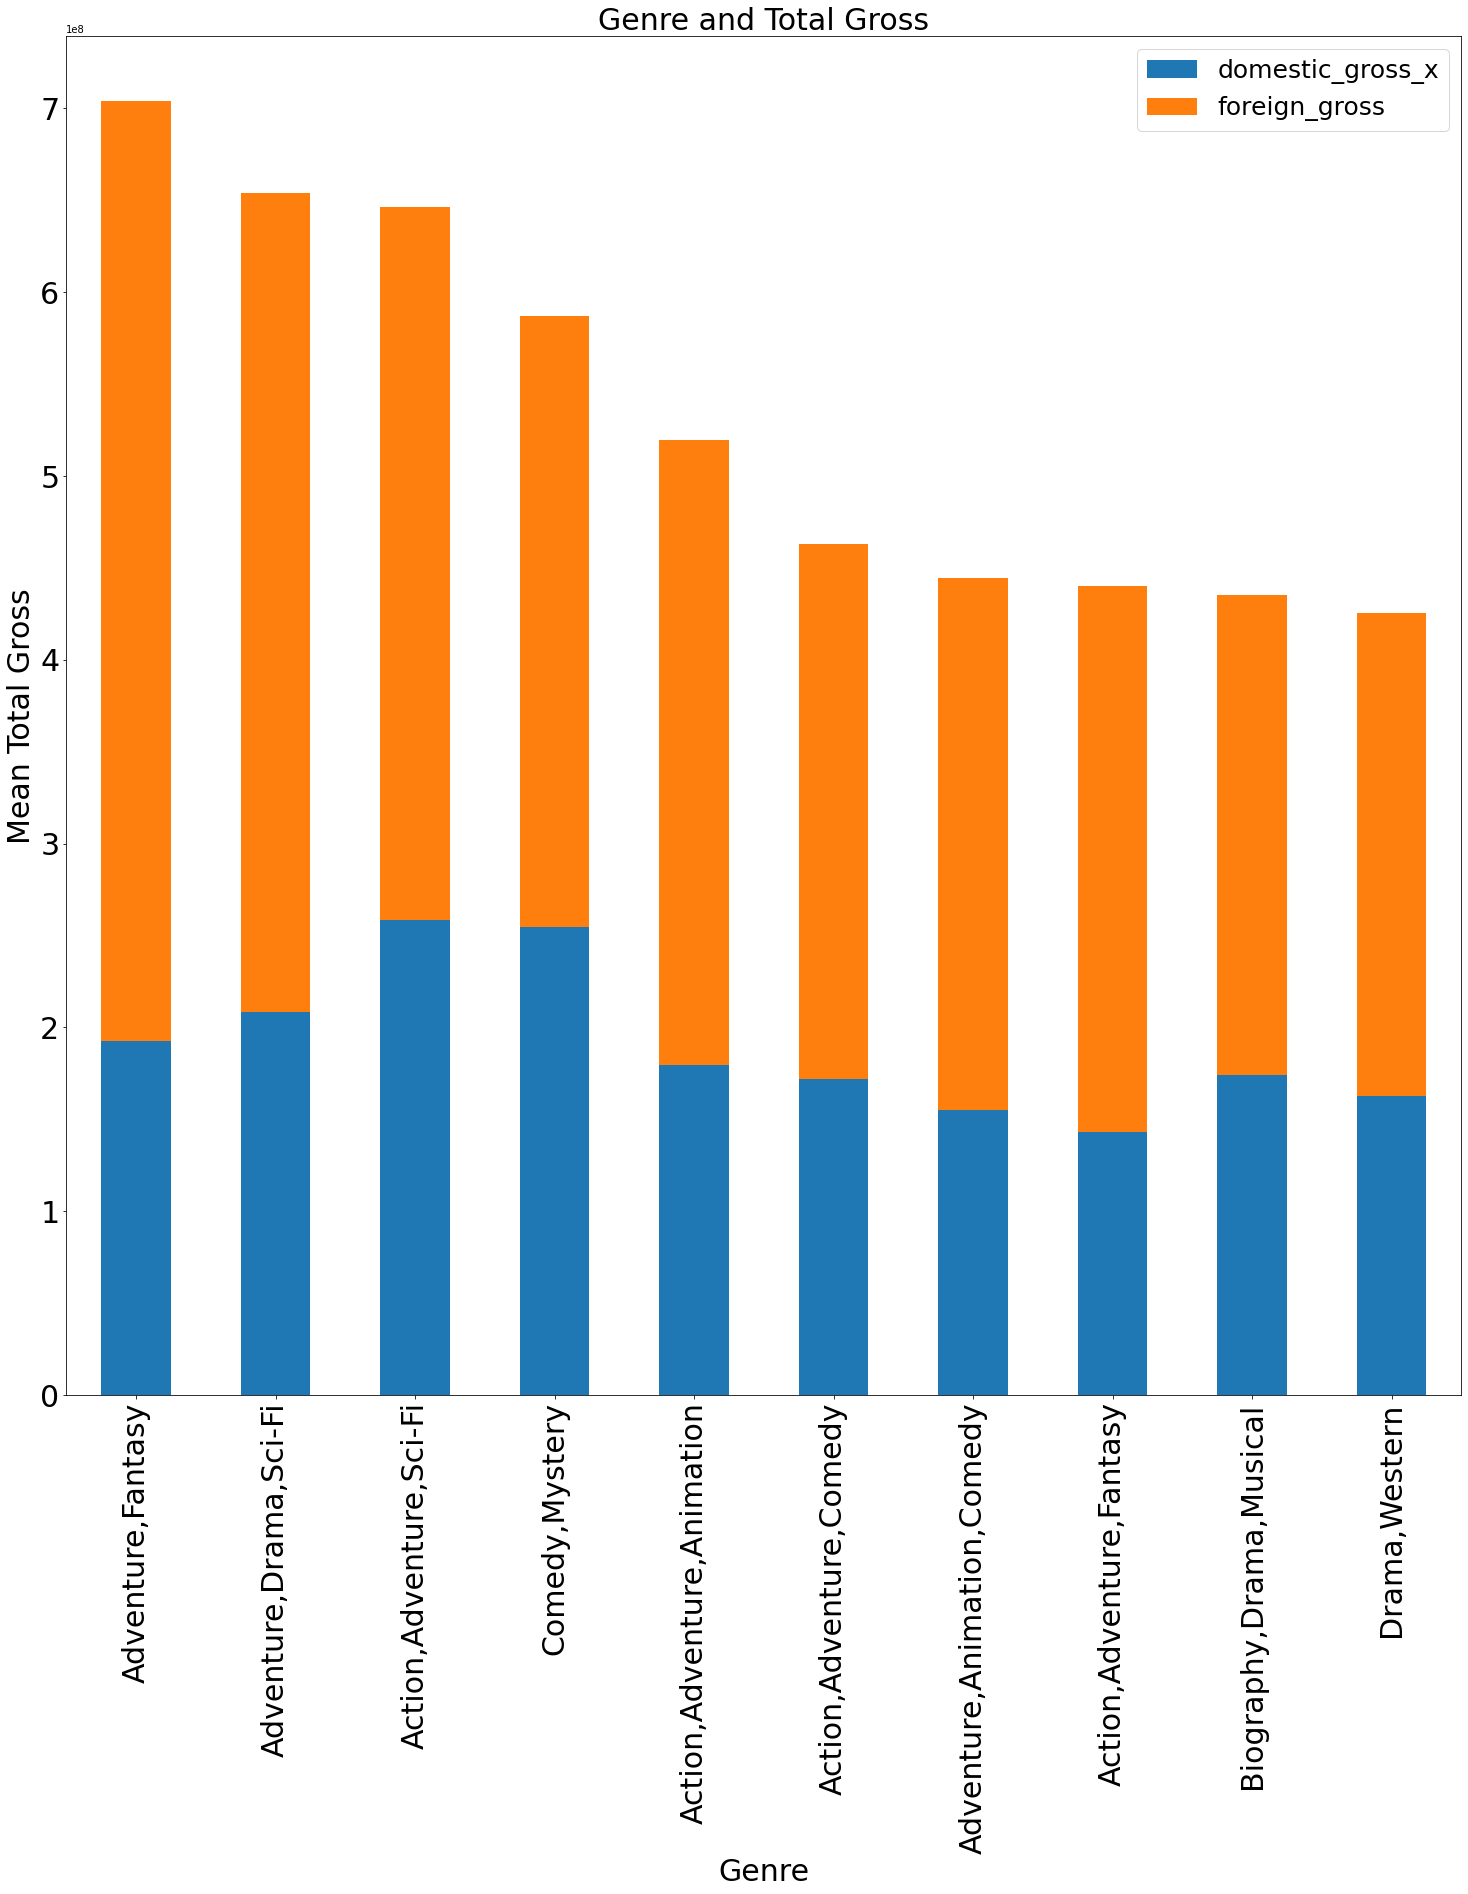

In [116]:
group_genre.head(10).plot.bar(y=['domestic_gross_x','foreign_gross'],stacked=True,fontsize=30,rot=90,figsize=(25,25))
plt.title("Genre and Total Gross",fontsize=30)
plt.xlabel("Genre",fontsize=30)
plt.ylabel("Mean Total Gross",fontsize=30)
plt.legend(fontsize=25)

Starting to work with the Ratings dataFrame

In [117]:
rating.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


In [107]:
rating.shape

(26517, 10)

In [108]:
rating.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


Merging Ratings dataFrame with the previsouly merged data frames.

In [118]:
df1 = df.merge(rating,on=['title'])

In [119]:
df1.shape

(1123, 25)

In [120]:
df1.head()

,title,studio,domestic_gross_x,foreign_gross,total_gross,roi,year,tconst,original_title_x,runtime_minutes,...,worldwide_gross,Unnamed: 0,genre_ids,id_y,original_language,original_title_y,popularity,release_date_y,vote_average,vote_count
0,Avengers: Age of Ultron,BV,459000000.0,946400000.0,1.405400e+09,89.356304,2015,tt2395427,Avengers: Age of Ultron,141.0,...,1.403014e+09,14169,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,44.383,2015-05-01,7.3,13457
1,Black Panther,BV,700100000.0,646900000.0,1.347000e+09,119.533218,2018,tt1825683,Black Panther,134.0,...,1.348258e+09,3444,"[28, 16]",86841,en,Black Panther,2.058,2011-01-18,5.1,11
2,Black Panther,BV,700100000.0,646900000.0,1.347000e+09,119.533218,2018,tt1825683,Black Panther,134.0,...,1.348258e+09,23817,"[28, 12, 14, 878]",284054,en,Black Panther,44.140,2018-02-16,7.4,12365
3,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,1.309500e+09,145.205948,2018,tt4881806,Jurassic World: Fallen Kingdom,128.0,...,1.305773e+09,23829,"[28, 12, 878]",351286,en,Jurassic World: Fallen Kingdom,34.958,2018-06-22,6.5,5995
4,Frozen,BV,400700000.0,875700000.0,1.276400e+09,212.956024,2013,tt2294629,Frozen,102.0,...,1.272470e+09,148,[53],44363,en,Frozen,9.678,2010-02-05,5.8,987


Creating Plot that will show the ROI against the rating that was received through IMDB.

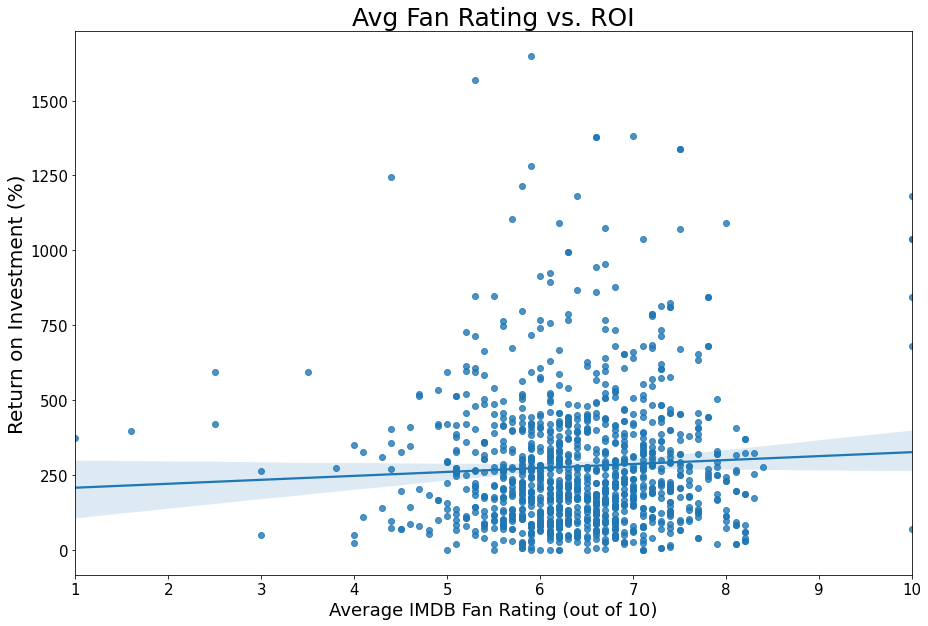

In [121]:
fig, ax = plt.subplots(figsize=(15,10))

regplot = sns.regplot(x='vote_average',y='roi',data=df1)
regplot.set_xlabel('Average IMDB Fan Rating (out of 10)', fontsize=18)
regplot.set_ylabel('Return on Investment (%)', fontsize=20)
regplot.set_title('Avg Fan Rating vs. ROI', fontsize=25)
plt.xticks([1,2,3,4,5,6,7,8,9,10],fontsize=15)
plt.yticks(fontsize=15);